In [1]:
import pandas as pd
import numpy as np 
from rdkit import Chem


In [25]:
df = pd.read_csv("melting-point-data/train.csv")
df_test = pd.read_csv("melting-point-data/test.csv")

In [26]:
#Neues Feature (Gewicht der Molekülverbindung)

from rdkit.Chem import Descriptors


def mol_weight_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return Descriptors.MolWt(mol)

df_test["MolWeight"] = df_test["SMILES"].apply(mol_weight_from_smiles)

df.head()

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_test.to_csv("melting-point-data/test_newFeature.csv")

df[["Tm"]].head(20)

,Tm
0,213.15
1,407.15
2,324.15
3,351.15
4,126.15
5,275.15
6,321.65
7,267.25
8,370.15
9,213.00


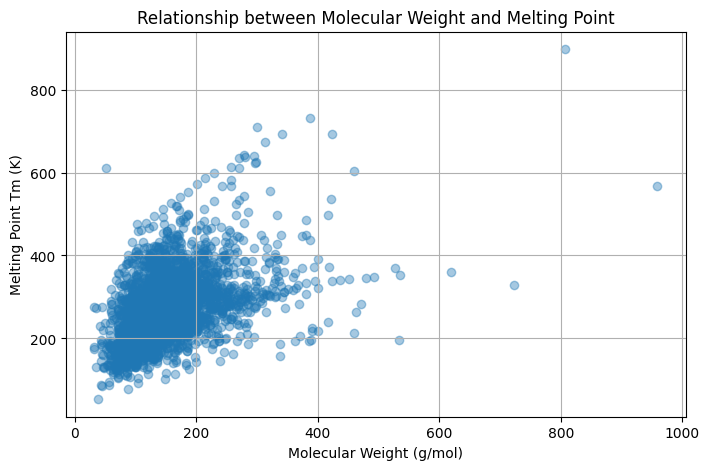

In [19]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

# load train.csv
df = pd.read_csv("melting-point-data/train.csv")

# compute MolWeight
df["MolWeight"] = df["SMILES"].apply(lambda s: Descriptors.MolWt(Chem.MolFromSmiles(s)))

# scatterplot
plt.figure(figsize=(8,5))
plt.scatter(df["MolWeight"], df["Tm"], alpha=0.4)
plt.xlabel("Molecular Weight (g/mol)")
plt.ylabel("Melting Point Tm (K)")
plt.title("Relationship between Molecular Weight and Melting Point")
plt.grid(True)
plt.show()
